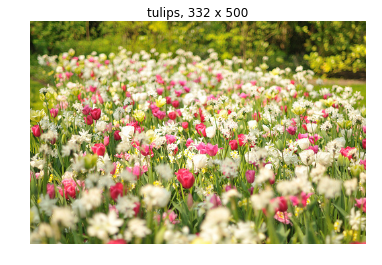

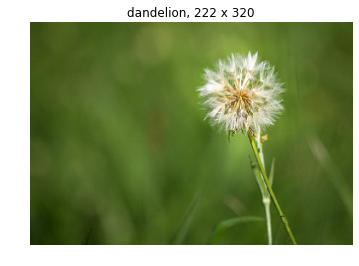

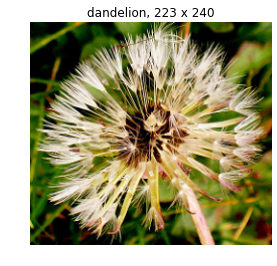

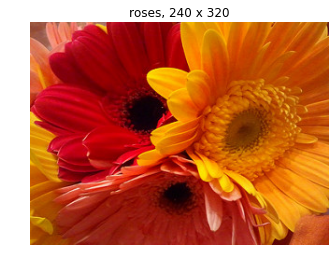

In [23]:
# -*- coding: utf-8 -*-
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

import tensorflow as tf
import numpy as np

slim = tf.contrib.slim

##-----copy the folder datasets as "models/slim/datasets" to this folder.
#cp -r ../../models/slim/datasets .
from datasets import download_and_convert_flowers,dataset_factory

#download_and_convert_flowers.run("/tmp/flowers")
##-----comment out above one-time for download and convert.----


with tf.Graph().as_default(): 
    dataset = dataset_factory.get_dataset('flowers', 'train', "/tmp/flowers")

    #dataset = flowers.get_split('train', flowers_data_dir)
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
        dataset, common_queue_capacity=32, common_queue_min=1)
    image, label = data_provider.get(['image', 'label'])
    
    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            for i in xrange(4):
                np_image, np_label = sess.run([image, label])
                height, width, _ = np_image.shape
                class_name = name = dataset.labels_to_names[np_label]
                
                plt.figure()
                plt.imshow(np_image)
                plt.title('%s, %d x %d' % (name, height, width))
                plt.axis('off')
                plt.show()
                
